# **Multi-layer Perceptron**

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# Load tips dataset
tips = sns.load_dataset('tips')

# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', 
                          input_shape=(X_train.shape[1],)), # Input layer
    
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', loss[0])

Epoch 1/100
7/7 [==============================] - 2s 3ms/step - loss: 8.4651 - mae: 2.5649
Epoch 2/100
7/7 [==============================] - 0s 16ms/step - loss: 6.1760 - mae: 2.1062
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 4.3457 - mae: 1.6876
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 3.0041 - mae: 1.3447
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 2.1202 - mae: 1.1238
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 1.6637 - mae: 1.0001
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 1.4915 - mae: 0.9561
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 1.4288 - mae: 0.9339
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 1.3549 - mae: 0.9010
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 1.2971 - mae: 0.8805
Epoch 11/100
7/7 [==============================] - 0s 3ms/step - loss: 1.2563

In [5]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', loss[0])
print('Mean Absolute Error: ', loss[1])



Mean Squared Error:  0.8792445659637451
Mean Absolute Error:  0.7843889594078064


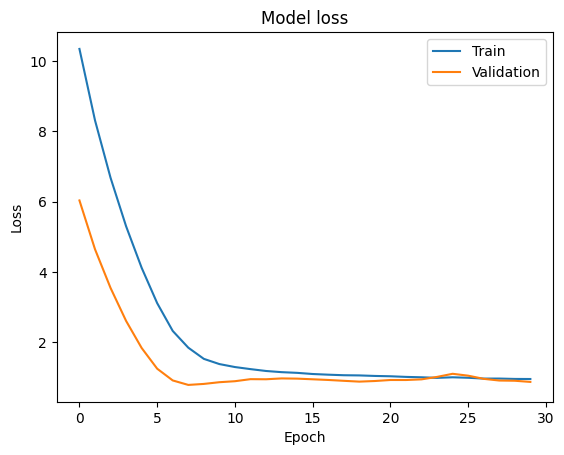

In [6]:
# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

---

# Early Stopping of Epochs

Epoch 1/100
7/7 [==============================] - 1s 85ms/step - loss: 9.4339 - val_loss: 5.0643
Epoch 2/100
7/7 [==============================] - 0s 17ms/step - loss: 7.3179 - val_loss: 3.5557
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 5.4308 - val_loss: 2.3347
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 3.8241 - val_loss: 1.4607
Epoch 5/100
7/7 [==============================] - 0s 19ms/step - loss: 2.6727 - val_loss: 1.0911
Epoch 6/100
7/7 [==============================] - 0s 17ms/step - loss: 1.9107 - val_loss: 1.2056
Epoch 7/100
7/7 [==============================] - 0s 19ms/step - loss: 1.6284 - val_loss: 1.4655
Epoch 8/100
7/7 [==============================] - 0s 18ms/step - loss: 1.5449 - val_loss: 1.5335
Epoch 9/100
7/7 [==============================] - 0s 19ms/step - loss: 1.4782 - val_loss: 1.4815
Epoch 10/100
7/7 [==============================] - 0s 19ms/step - loss: 1.4110 - val_loss: 1.4350


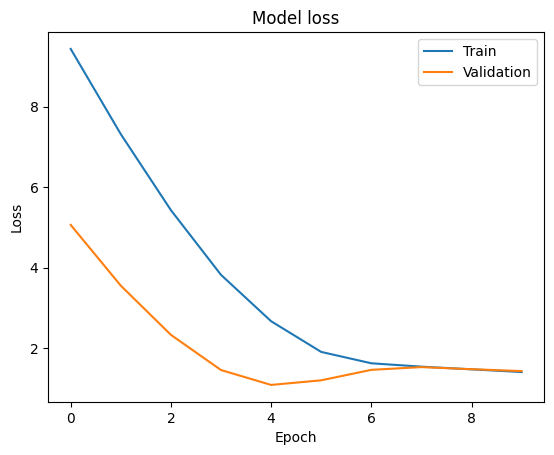

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

---